In [1]:
print("Source: https://www.youtube.com/watch?v=rwqgVzWbq8w&t=1985s")

Source: https://www.youtube.com/watch?v=rwqgVzWbq8w&t=1985s


In [2]:
import pandas
import numpy
import seaborn

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [3]:
train_dataframe = pandas.read_csv('/media/carlos/ea8ff4ea-c5fd-4b9d-bf66-15507c1d2037/Documentos/Banco_de_dados/Codes/04_HousePrices/train.csv',
                                 index_col='Id')
train_dataframe

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000


In [4]:
test_dataframe = pandas.read_csv('/media/carlos/ea8ff4ea-c5fd-4b9d-bf66-15507c1d2037/Documentos/Banco_de_dados/Codes/04_HousePrices/test.csv',
                                index_col='Id')
test_dataframe

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [5]:
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1200 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [6]:
train_numeric_data = train_dataframe.describe()
train_numeric_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1200.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1451.00000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.922550,70.045833,10517.225497,6.100069,5.575051,1971.272104,1984.879369,103.75672,443.374914,46.382454,...,93.804661,46.645648,21.969157,3.411926,15.071282,2.760795,43.518849,6.322138,2007.815627,180944.102810
std,42.304033,24.294456,9984.675721,1.383171,1.113125,30.212814,20.645927,181.10815,456.142186,161.248500,...,124.249421,66.276387,61.137400,29.327247,55.775138,40.191018,496.291826,2.704540,1.328542,79464.918335
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.00000,383.000000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,712.000000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
test_numeric_data = test_dataframe.describe()
test_numeric_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [8]:
numeric_data = train_dataframe.describe()
numeric_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1200.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1451.00000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.922550,70.045833,10517.225497,6.100069,5.575051,1971.272104,1984.879369,103.75672,443.374914,46.382454,...,93.804661,46.645648,21.969157,3.411926,15.071282,2.760795,43.518849,6.322138,2007.815627,180944.102810
std,42.304033,24.294456,9984.675721,1.383171,1.113125,30.212814,20.645927,181.10815,456.142186,161.248500,...,124.249421,66.276387,61.137400,29.327247,55.775138,40.191018,496.291826,2.704540,1.328542,79464.918335
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.00000,383.000000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,712.000000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
train_category_data = train_dataframe.describe(exclude=numpy.number)
train_category_data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1459,1459,91,1459,1459,1459,1459,1459,1459,1459,...,1378,1378,1378,1378,1459,7,281,54,1459,1459
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1150,1453,50,924,1310,1458,1051,1381,225,1259,...,869,605,1310,1325,1339,3,157,49,1266,1197


In [10]:
test_category_data = test_dataframe.describe(exclude=numpy.number)
test_category_data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1459,107,1459,1459,1457,1459,1459,1459,1459,...,1383,1381,1381,1381,1459,3,290,51,1458,1459
unique,5,2,2,4,4,1,5,3,25,9,...,6,3,4,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1114,1453,70,934,1311,1457,1081,1396,218,1251,...,853,625,1293,1328,1301,2,172,46,1258,1204


In [11]:
train_dataframe[train_dataframe['Street'] != "Pave"]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
53,90,RM,110.0,8472,Grvl,NaN,IR2,Bnk,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,110000
336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
583,90,RL,81.0,11841,Grvl,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,118500
813,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,Shed,54,6,2010,WD,Alloca,55993
1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1185,20,RL,50.0,35133,Grvl,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,186700


# Tratando variaveis categoricas nominais

## 1.Exclusão ou Substituição
## 2.One-hot Encoding
## 3.Ordinal Encoding
## 4.Label Encoding

### Columns to study: ExterCond: Evaluates the present condition of the material on the exterior

### BsmtQual: Evaluates the height of the basement

### BsmtCond: Evaluates the general condition of the basement

### HeatingQC: Heating quality and condition

### KitchenQual: Kitchen quality

### FireplaceQu: Fireplace quality

### GarageQual: Garage quality

### GarageCond: Garage condition

### PoolQC: Pool Quality


In [12]:
test_dataframe.describe(exclude=numpy.number)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1459,107,1459,1459,1457,1459,1459,1459,1459,...,1383,1381,1381,1381,1459,3,290,51,1458,1459
unique,5,2,2,4,4,1,5,3,25,9,...,6,3,4,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1114,1453,70,934,1311,1457,1081,1396,218,1251,...,853,625,1293,1328,1301,2,172,46,1258,1204


In [13]:
ordinal_features = ['BsmtQual','BsmtCond','HeatingQC','KitchenQual',
'FireplaceQu','GarageQual','GarageCond','PoolQC']

nominal_features = list(set(train_dataframe.select_dtypes(include='object').columns.values) - set(ordinal_features))

In [14]:
X = train_dataframe.drop(['SalePrice'], axis = 1)

X_cats = X.select_dtypes(include='object')
X_cats_names = X_cats.columns.values
# X_cats_ordinal = X_cats[ordinal_features]
# X_cats_nominal = X_cats[nominal_features]
X_nums = X.select_dtypes(exclude='object')
y = train_dataframe.SalePrice

X_test_cats = test_dataframe.select_dtypes(include = 'object')
X_test_cats_names = X_test_cats.columns.values
# X_test_cats_ordinal = X_test_cats[ordinal_features]
# X_test_cats_nominal = X_test_cats[nominal_features]
X_test_nums = test_dataframe.select_dtypes(exclude = 'object')

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = 3)

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
imp_mean = SimpleImputer(strategy = 'mean')
imp_most = SimpleImputer(strategy = 'most_frequent')

In [18]:
X_cats = imp_most.fit_transform(X_cats)
X_nums = imp_mean.fit_transform(X_nums)
X_test_cats = imp_most.transform(X_test_cats)
X_test_nums = imp_mean.transform(X_test_nums)

In [19]:
train_dataframe.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [20]:
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
ordinal_encoder = OrdinalEncoder()

In [21]:
pandas.DataFrame(X_cats, columns=[X_cats_names])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,FV,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1455,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1456,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1457,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,Gd,GdPrv,Shed,WD,Normal


In [22]:
X_cats_nominal = one_hot_encoder.fit_transform(pandas.DataFrame(X_cats, columns=[X_cats_names])[nominal_features])
X_test_cats_nominal = one_hot_encoder.transform(pandas.DataFrame(X_cats, columns=[X_cats_names])[nominal_features])

/home/carlos/Apps/Anaconda/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/carlos/Apps/Anaconda/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/carlos/Apps/Anaconda/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [23]:
X_cats_ordinal = ordinal_encoder.fit_transform(pandas.DataFrame(X_cats, columns=[X_cats_names])[ordinal_features])
X_test_cats_ordinal = ordinal_encoder.transform(pandas.DataFrame(X_test_cats, columns=[X_cats_names])[ordinal_features])

/home/carlos/Apps/Anaconda/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/carlos/Apps/Anaconda/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/carlos/Apps/Anaconda/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [24]:
print(X_cats_nominal.shape)
print(X_cats_ordinal.shape)
print(X_test_cats_nominal.shape)
print(X_test_cats_ordinal.shape)

(1459, 217)
(1459, 8)
(1459, 217)
(1459, 8)


In [25]:
from scipy.sparse import hstack

In [26]:
X_transformed = hstack((X_cats_nominal, X_cats_ordinal, X_nums))
X_test_transformed = hstack((X_test_cats_nominal, X_test_cats_ordinal, X_test_nums))

In [27]:
train_dataframe.corr(method='spearman').SalePrice.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.809936
GrLivArea        0.731302
GarageCars       0.690820
YearBuilt        0.652662
GarageArea       0.649481
FullBath         0.635960
TotalBsmtSF      0.603051
GarageYrBlt      0.593744
1stFlrSF         0.575643
YearRemodAdd     0.571102
TotRmsAbvGrd     0.532574
Fireplaces       0.519173
OpenPorchSF      0.477995
LotArea          0.456561
MasVnrArea       0.421267
LotFrontage      0.409210
WoodDeckSF       0.354683
HalfBath         0.343427
BsmtFinSF1       0.302166
2ndFlrSF         0.293555
BedroomAbvGr     0.234974
BsmtFullBath     0.225554
BsmtUnfSF        0.185018
ScreenPorch      0.099982
MoSold           0.069416
3SsnPorch        0.065406
PoolArea         0.058431
MSSubClass       0.006916
BsmtHalfBath    -0.012258
YrSold          -0.029871
BsmtFinSF2      -0.038290
MiscVal         -0.062801
LowQualFinSF    -0.067740
OverallCond     -0.129064
KitchenAbvGr    -0.164851
EnclosedPorch   -0.218488
Name: SalePrice, dtype: float64

<AxesSubplot:>

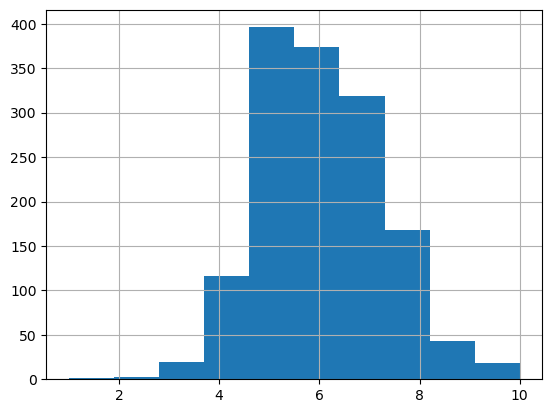

In [28]:
train_dataframe.OverallQual.hist()

In [29]:
train_dataframe.corr(method='spearman')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.314141,-0.269631,0.107387,-0.071224,0.035550,0.006014,0.024485,-0.106782,-0.081944,...,0.024875,0.032628,0.010640,-0.035943,-0.021913,0.033209,-0.033020,0.018333,-0.027290,0.006916
LotFrontage,-0.314141,1.000000,0.649657,0.255358,-0.083547,0.194687,0.117182,0.259191,0.153577,0.051565,...,0.108707,0.177742,-0.095651,0.064020,0.043947,0.084537,0.024284,0.025822,0.003423,0.409210
LotArea,-0.269631,0.649657,1.000000,0.233510,-0.047013,0.103412,0.075264,0.177661,0.171806,0.071774,...,0.184212,0.176859,-0.066478,0.062308,0.092375,0.084488,0.059324,0.006438,-0.027484,0.456561
OverallQual,0.107387,0.255358,0.233510,1.000000,-0.177076,0.647453,0.557490,0.413211,0.133634,-0.116164,...,0.261071,0.436015,-0.162761,0.032811,0.046130,0.056640,-0.088185,0.061425,-0.025367,0.809936
OverallCond,-0.071224,-0.083547,-0.047013,-0.177076,1.000000,-0.416784,-0.040968,-0.178761,-0.011553,0.101270,...,-0.043714,-0.133859,0.109947,0.032452,0.074889,-0.005572,0.086737,-0.007149,0.050157,-0.129064
YearBuilt,0.035550,0.194687,0.103412,0.647453,-0.416784,1.000000,0.684433,0.402249,0.189865,-0.111352,...,0.288497,0.393188,-0.408756,0.022463,-0.073173,0.008936,-0.091837,0.018601,-0.014066,0.652662
YearRemodAdd,0.006014,0.117182,0.075264,0.557490,-0.040968,0.684433,1.000000,0.233923,0.063912,-0.124795,...,0.231668,0.354202,-0.235328,0.051633,-0.046008,0.002741,-0.091042,0.021021,0.045298,0.571102
MasVnrArea,0.024485,0.259191,0.177661,0.413211,-0.178761,0.402249,0.233923,1.000000,0.242284,-0.059997,...,0.175000,0.209311,-0.179843,0.040930,0.038028,0.004827,-0.050396,0.017676,0.000653,0.421267
BsmtFinSF1,-0.106782,0.153577,0.171806,0.133634,-0.011553,0.189865,0.063912,0.242284,1.000000,0.048638,...,0.178144,0.080710,-0.148094,0.046956,0.072239,0.057660,0.005282,-0.016358,0.020702,0.302166
BsmtFinSF2,-0.081944,0.051565,0.071774,-0.116164,0.101270,-0.111352,-0.124795,-0.059997,0.048638,1.000000,...,0.066138,-0.070930,0.042384,-0.015855,0.059394,0.068370,0.030864,-0.025687,0.025833,-0.038290


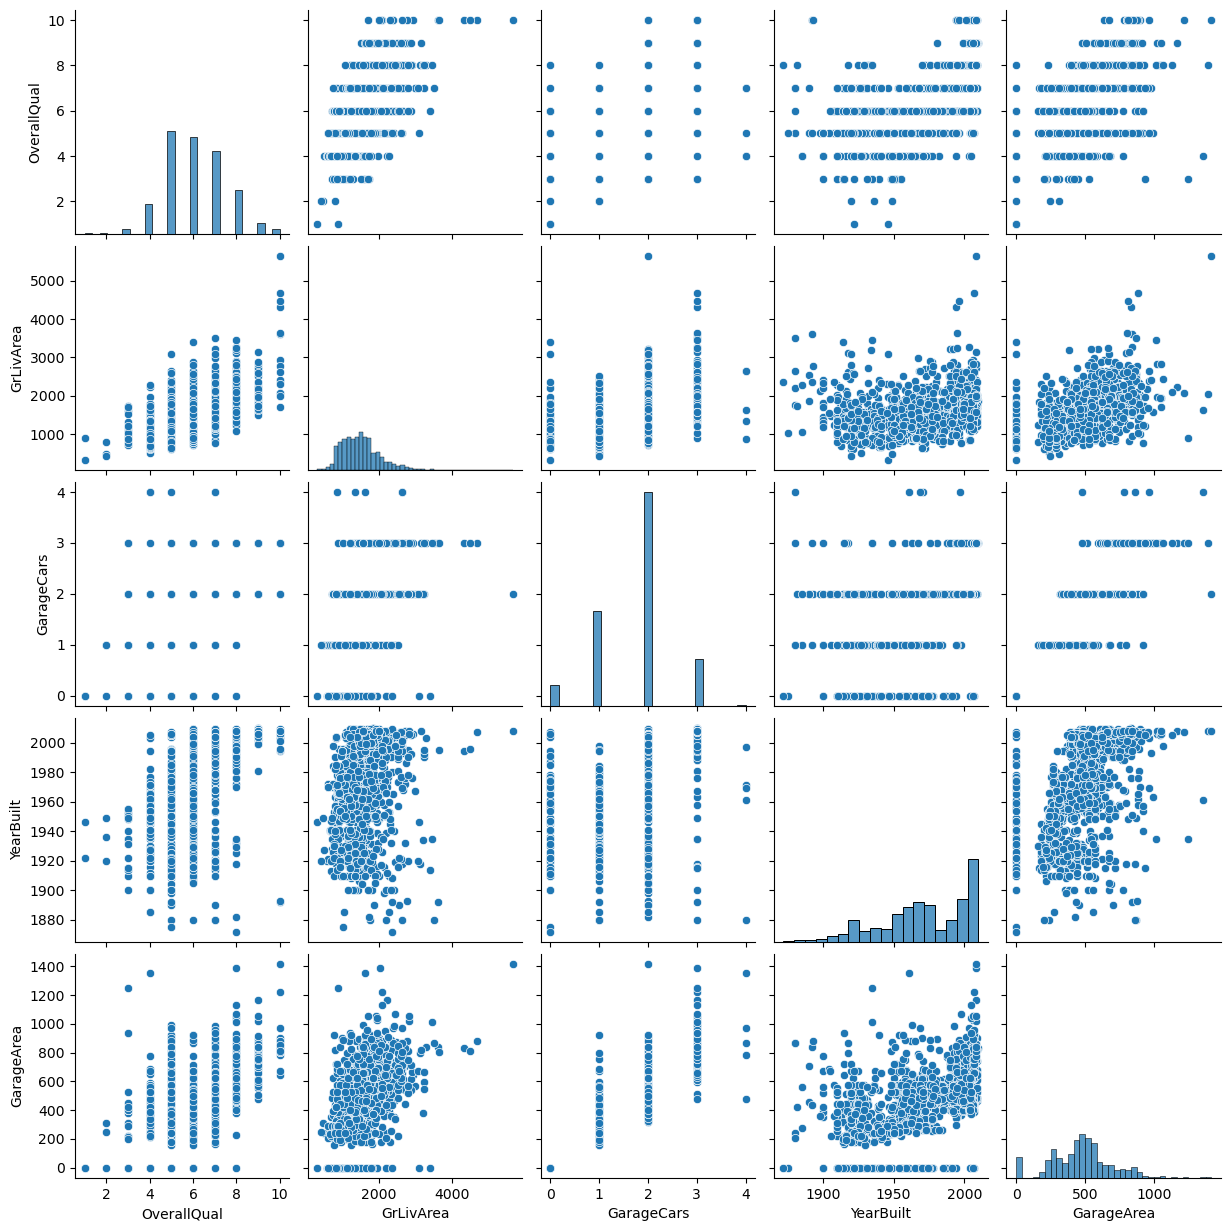

In [30]:
#O ideal neste estudo é verificar os outliers e remove-los
seaborn.pairplot(train_dataframe[['OverallQual','GrLivArea',
                                 'GarageCars','YearBuilt','GarageArea']])

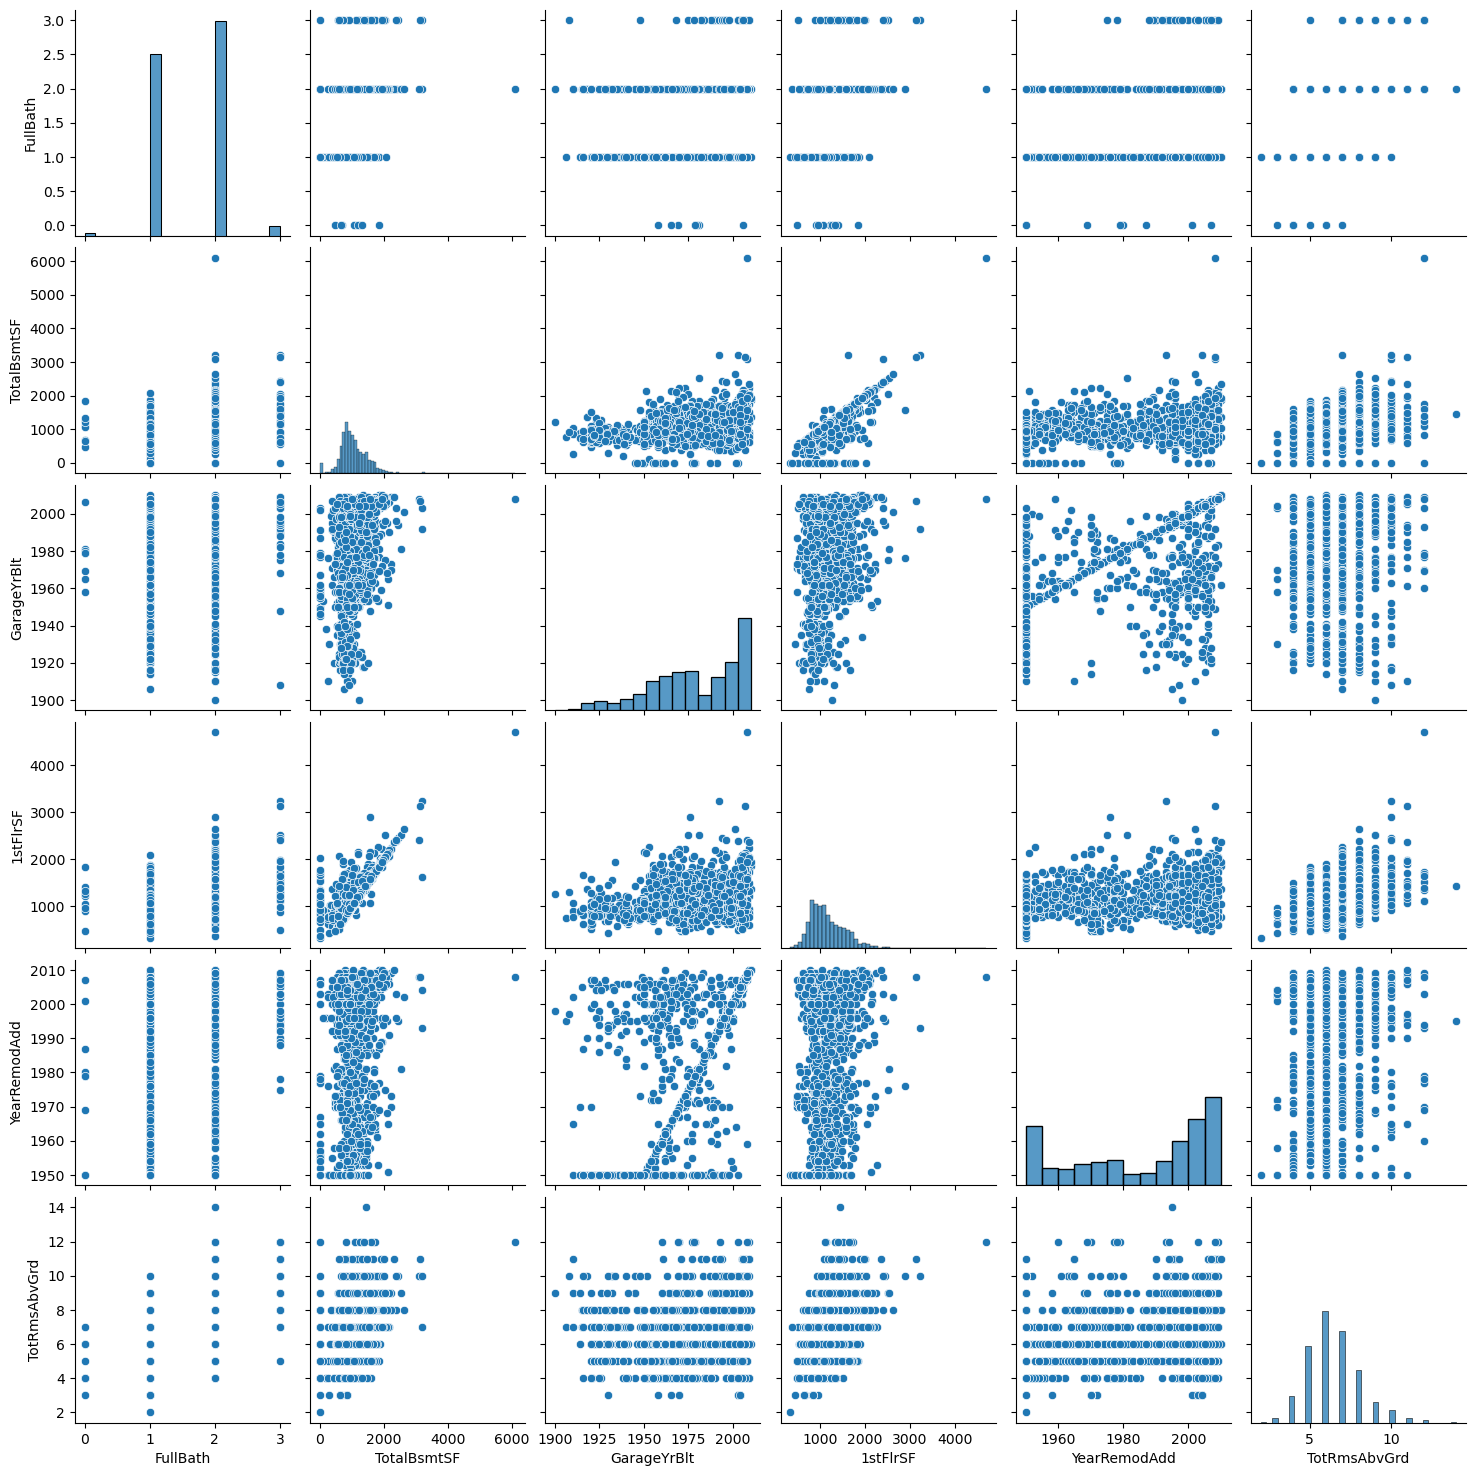

In [31]:
seaborn.pairplot(train_dataframe[['FullBath','TotalBsmtSF','GarageYrBlt',
                                '1stFlrSF','YearRemodAdd','TotRmsAbvGrd']])

/home/carlos/Apps/Anaconda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

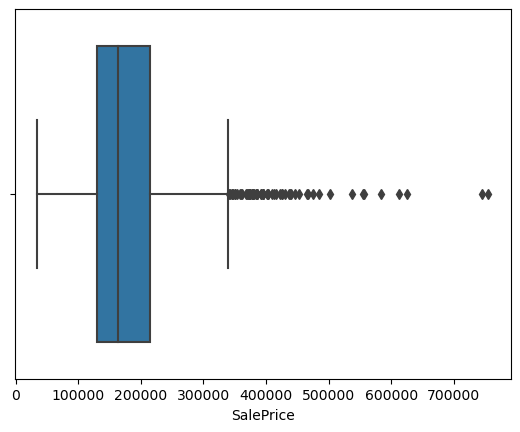

In [32]:
seaborn.boxplot(y)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

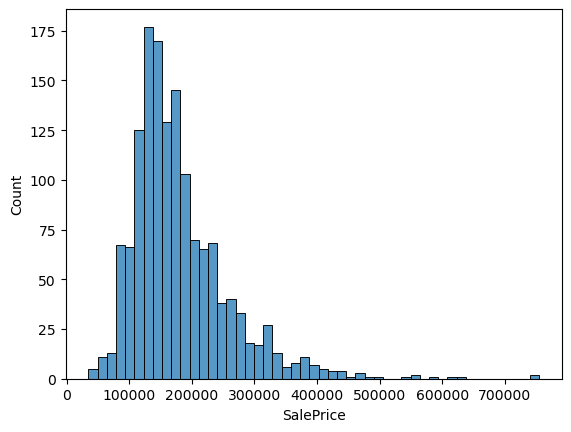

In [33]:
seaborn.histplot(train_dataframe.SalePrice)

In [34]:
house_prices_model = DecisionTreeRegressor(random_state = 0)

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y, train_size = 0.8, random_state = 3)

In [36]:
house_prices_model = DecisionTreeRegressor(random_state=0)

In [37]:
house_prices_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [38]:
val_predictions = house_prices_model.predict(X_val)

In [39]:
mean_squared_error(y_val, val_predictions, squared=False)

37207.642343709405

In [40]:
mean_absolute_error(y_val, val_predictions)

24598.270547945205

In [41]:
pandas.DataFrame({'y_val':y_val,
             'val_pred':val_predictions,
             'abs_err':abs(val_predictions-y_val)}).describe()

,y_val,val_pred,abs_err
count,292.000000,292.000000,292.000000
mean,185170.253425,185395.551370,24598.270548
std,82576.526189,82765.230578,27964.474921
min,52500.000000,37900.000000,0.000000
25%,131850.000000,130750.000000,6887.000000
50%,161750.000000,159975.000000,14000.000000
75%,223875.000000,215000.000000,29525.000000
max,745000.000000,755000.000000,165396.000000


### Analise de outlier
### Analise de correlação

# Normalização dos dados

verificar como tratar as matrizes esparças

In [46]:
X_transformed_max = max_scaler.fit_transform(X_transformed)
X_test_transformed_max = max_scaler.transform(X_test_transformed)

In [47]:
from sklearn.preprocessing import MaxAbsScaler

In [48]:
from sklearn import preprocessing

In [49]:
max_scaler = MaxAbsScaler()
std_scaler = preprocessing.StandardScaler(with_mean = False)

In [50]:
std_scaler.fit(X_transformed_max)
X_transformed_stand = std_scaler.transform(X_transformed_max)
X_test_transformed_stand = std_scaler.transform(X_test_transformed_max)

In [51]:
X_train, X_val, y_train, y_val = train_test_split(X_transformed_stand, y, train_size = 0.8, random_state = 3)

In [52]:
house_prices_model = DecisionTreeRegressor(random_state=0)

In [53]:
house_prices_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [54]:
val_predictions = house_prices_model.predict(X_val)

In [55]:
mean_squared_error(y_val, val_predictions, squared=False)

37196.81941785876

In [56]:
mean_absolute_error(y_val, val_predictions)

24563.33904109589

## Outra normalização

In [ ]:
# X_transformed_stand = preprocessing.fit_transform(X_transformed)
# X_test_transformed_stand = preprocessing.transform(X_test_transformed)

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

candidate_max_leaf_nodes = [250]
for node in candidate_max_leaf_nodes:
    model = RandomForestRegressor(max_leaf_nodes=node,)
    model.fit(X_train, y_train)
    score = cross_val_score(model, X_train, y_train, cv=10)
    print(score.mean())

0.8522319667034864


using imp_mean -> median = 0.8498893396899749

using imp_mean -> mean = 0.8542681921309254

using imp_mean -> mean |Dados normalizados| = 0.8522319667034864

